# Analysis of the key features using Correspondence Analysis (CA)

From the previous notebook 'sneaker_scraping' we have a data set **'Sneaker_Info_data'** with all the sneakers available. In this notebook we aim to analyze its main features using correspondance analysis (CA). This technique is commonly known as the Principal Component Analysis (PCA) for categorical data. 

It will help us to determine **which features or attributes of the data are most related to each other.**

Before applying it, we look into each of these attributes in detail and make the necessary transformations. Continuous attributes need to be discretized to be used in CA. Categorical attributes sometimes need simplification and new groupings.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import mca
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100000)
pd.set_option('display.max_rows', 100000)

## Exploratory Analysis and Preparation for CA

This is the original data set we scrapped from StockX.com:

In [2]:
path = 'https://raw.githubusercontent.com/gabriellavinco/Sneaker_Data/master/Sneakers_Notebooks/Datasets/Sneaker_Info_data.csv'
df = pd.read_csv(path, index_col=None, header=0)
df.columns
df

ID              Brand  \
0     7154866b-6f46-4525-b7d3-f7f91ba78fab        New Balance   
1     de62db29-a612-4824-bfa2-24a757233c17        New Balance   
2     545efd57-816c-4cd5-8d4a-18deb4af035e        New Balance   
3     9dd76318-1e22-42fa-a8cf-2228a8a570c1              Crocs   
4     85bf50a1-c610-4d9a-9993-d82a8435a296             Reebok   
5     bf0e2d1f-cb4f-4103-baea-3a1951eeb990               BAPE   
6     a6d3c2bd-fc96-41f8-b6ac-ddba77474550              Yeezy   
7     685143e6-a965-4afe-a500-96d403167813        New Balance   
8     4ce73ae5-1d15-402b-8306-e790512347f9        New Balance   
9     74cee2cd-43cb-4ea6-a1bc-41ace69bdc9d        New Balance   
10    0e6f78e5-4d14-4e79-a218-883276829a41              Yeezy   
11    c080c98b-ddcb-4e85-bfb2-0a788b67b060           Converse   
12    75253c0f-6f72-4c7b-a2a8-ad3f0442680c               Vans   
13    383a42df-0b97-4484-8ba6-e910cc190cf4           Converse   
14    892ed22f-e4db-4fa9-bad7-0d49977e7c6f       Under Armour   
15    ff6429f5-b38d-4f5f-9cd8-a71d70332d79        New Balance   
16    d205d59e-57e6-42a1-b929-136e1bec9a77        New Balance   
17    d912ef67-84d3-4d76-a6ee-65629c22ad0e        New Balance   
18    7a8819fe-2f82-4193-b321-a041e305907b        New Balance   
19    e87c0e9f-e3d3-4f3b-b0df-a165682bee4c         Timberland   
20    b1dc34c3-6c03-4f70-bf2e-5fa3c6061e2c           Converse   
21    1cb085b1-dc75-4db1-a9dd-6c123f4d500a               Vans   
22    e57c6b51-0ea1-44a1-8c6d-89d1a5d44690           Converse   
23    91ce3e38-0022-41e0-8743-aa2f46a4e36a          Notwoways   
24    0231addc-b203-4fd7-b7f3-7eb708156663        New Balance   
25    3414f48d-e8bf-463f-9e6b-9d8520a202b9         Timberland   
26    9557ee5b-0271-40bc-997e-dbddba703fe5               BAPE   
27    3480f7fc-2b8f-4875-9a0d-ce7f6670aa6a        New Balance   
28    88cc5d01-2977-484b-ae3b-d85c5282119d           Converse   
29    d4c8ce2d-103d-47fc-836e-d073de81ff19             Reebok   
30    a79008ba-5cac-49cd-99b3-4e6e6f54be19        New Balance   
31    964baf22-e470-4f5f-80f5-a63c0788493b        New Balance   
32    9d958980-1b8b-476d-b040-fc923838d832             Reebok   
33    068b3f9c-1c68-4ca1-9a4e-7922f7939746             Reebok   
34    9879a932-5e58-4dd3-893c-cd9ccb2c2538        New Balance   
35    67a9b816-c955-4419-8e65-396939d6ad95        New Balance   
36    2f974582-32e0-41c5-9aee-9aed1fdd1137               Puma   
37    49565038-d220-4a3e-a819-bf90fb876e61              Asics   
38    79b08c11-2277-4aa0-b497-d6cbbf847edd        New Balance   
39    4765446e-181e-40f6-be87-137d792047d8        New Balance   
40    21661d9f-682f-40fd-a9e6-5ad0066c76c4           Converse   
41    fedfeae3-478f-4956-b8c4-5c7e476f518c           Converse   
42    195f9257-e1d6-47b9-9b92-0bcce54f53d3           Converse   
43    febfa54d-3ebe-4fa9-adf3-ee9531923a2a             Reebok   
44    b96b3b77-dabc-4b5b-9a7f-d23fc38d0a05        New Balance   
45    01a00b57-05ab-44f7-a546-ab869c759622               Vans   
46    3a8f56c8-c206-4fa3-b62f-04f590a03ee7           Converse   
47    63f672cb-3bf1-4b8a-9477-ac7b8768a270              Yeezy   
48    3ff3bd97-4904-4fb7-821f-ff66bd151c73        New Balance   
49    a9bb1f0f-b1c3-4cc7-ac76-2c980d1001b7           Converse   
50    5f4e19db-c2fe-4319-8262-e8932801108f           Converse   
51    c788ee8c-909a-4e7d-abbb-3a887fac1196              Yeezy   
52    cd5c3e0b-1b00-488e-ae10-8e790afce254        New Balance   
53    aa686c6d-1719-4298-b10e-293ddf6568f2             Reebok   
54    44e8626b-6a31-4892-94fb-d6c617abe01f           Converse   
55    1f7c5982-788a-403c-b5e0-156eb0dca8a3           Converse   
56    b8003705-1afb-4427-b1df-da934dd849cb        New Balance   
57    19438180-e056-45aa-81bc-c8240f2d2aa6              Crocs   
58    72011d1b-28ef-4741-b0f5-52bc186c99b1           Converse   
59    8eea3b3f-2f01-4800-8566-eda1fbb747e4               BAPE   
60    cf4922d0-43d1-4029-9131-ce2d48e671e4           Converse   
61    12eb

 <h3 style="color:skyblue">  Attribute 'ReleaseDate' and 'datecat' </h3>

This attribute is the time the sneaker dropped in the market. Since it is continuos, in order to apply CA, we will discretize it into a new variable <b style="color:skyblue">  'datecat' </b>.

One problem with this variable is its missing values. These observations have a null date:

In [3]:
a = df[df['ReleaseDate']=='0']
len(a)/len(df)

0.3182230281051677

Since they are around 30% of the data set we cannot ignore them. These values will have their own category **'Unknown'**. The rest of the values will be divided into:
- **'New'** if they were released in the previous 31 days
- **'Old'** otherwise


In [4]:
df['ReleaseDate'][df['ReleaseDate']=='0'] = '1980-01-13'
df['ReleaseDate'] = [datetime.strptime(d, '%Y-%m-%d') for d in df['ReleaseDate']]

ref = datetime.today()-timedelta(days=31)
delay = pd.Series([ref])
limite = delay.repeat(len(df))
limite.index = df['ReleaseDate'].index

df['datecat'] = 'Old'
df['datecat'][df['ReleaseDate']>limite] = 'New'
df['datecat'][df['ReleaseDate']=='1980-01-13'] = 'Unknown'
df[['ReleaseDate','datecat','Brand','Name','Gender']]

ReleaseDate  datecat              Brand  \
0     2021-02-27      Old        New Balance   
1     1980-01-13  Unknown        New Balance   
2     1980-01-13  Unknown        New Balance   
3     2019-12-10      Old              Crocs   
4     2021-02-05      Old             Reebok   
5     2020-01-25      Old               BAPE   
6     2020-04-16      Old              Yeezy   
7     2020-01-07      Old        New Balance   
8     1980-01-13  Unknown        New Balance   
9     1980-01-13  Unknown        New Balance   
10    2019-12-06      Old              Yeezy   
11    2020-10-22      Old           Converse   
12    2017-01-01      Old               Vans   
13    2018-01-01      Old           Converse   
14    2020-12-11      Old       Under Armour   
15    2021-04-02      Old        New Balance   
16    1980-01-13  Unknown        New Balance   
17    1980-01-13  Unknown        New Balance   
18    2020-05-08      Old        New Balance   
19    1980-01-13  Unknown         Timberland   
20    2020-09-14      Old           Converse   
21    2020-09-05      Old               Vans   
22    2020-10-22      Old           Converse   
23    2021-03-08      Old          Notwoways   
24    1980-01-13  Unknown        New Balance   
25    2018-01-01      Old         Timberland   
26    1980-01-13  Unknown               BAPE   
27    2020-01-07      Old        New Balance   
28    2020-11-19      Old           Converse   
29    2020-11-13      Old             Reebok   
30    2021-01-08      Old        New Balance   
31    1980-01-13  Unknown        New Balance   
32    2020-10-23      Old             Reebok   
33    2021-01-30      Old             Reebok   
34    2021-01-29      Old        New Balance   
35    1980-01-13  Unknown        New Balance   
36    2019-10-18      Old               Puma   
37    2020-11-27      Old              Asics   
38    2021-02-16      Old        New Balance   
39    1980-01-13  Unknown        New Balance   
40    2019-07-09      Old           Converse   
41    2020-09-01      Old           Converse   
42    2020-09-03      Old           Converse   
43    2020-08-21      Old             Reebok   
44    2020-09-12      Old        New Balance   
45    2020-08-07      Old               Vans   
46    2019-12-28      Old           Converse   
47    2019-12-06      Old              Yeezy   
48    2020-01-01      Old        New Balance   
49    2017-10-06      Old           Converse   
50    2019-05-10      Old           Converse   
51    2019-12-06      Old              Yeezy   
52    2019-05-04      Old        New Balance   
53    2020-07-31      Old             Reebok   
54    2020-05-15      Old           Converse   
55    2020-10-21      Old           Converse   
56    1980-01-13  Unknown        New Balance   
57    2020-07-28      Old              Crocs   
58    2020-09-03      Old           Converse   
59    2020-03-14      Old               BAPE   
60    2020-07-23      Old           Converse   
61    2018-01-01      Old         Timberland   
62    2020-01-03      Old             Reebok   
63    2018-12-02      Old               Puma   
64    2021-02-27      Old        New Balance   
65    2020-11-17      Old           Converse   
66    2021-02-27      Old               Puma   
67    1980-01-13  Unknown        New Balance   
68    2021-02-26      Old        New Balance   
69    2020-02-15      Old             Reebok   
70    2020-01-25      Old               BAPE   
71    1980-01-13  Unknown        New Balance   
72    2020-11-06      Old             Reebok   
73    2020-01-25      Old               BAPE   
74    2019-12-05      Old           Converse   
75    2014-07-01      Old               Vans   
76    2020-08-29      Old        New Balance   
77    2020-09-25      Old        New Balance   
78    2020-05-15      Old           Converse   
79    2020-12-04      Old               Puma   
80    2021-01-28      Old              Crocs   
81    2019-08-03      Old           Converse   
82    2020-10-31     

Finally, we can see the **frequency plot** of shoes by the year and month of 'ReleaseDate'. The category 'Unknown' was saved as the date presented for convenience.

We can see that most of the models offered in the website were released two years ago.

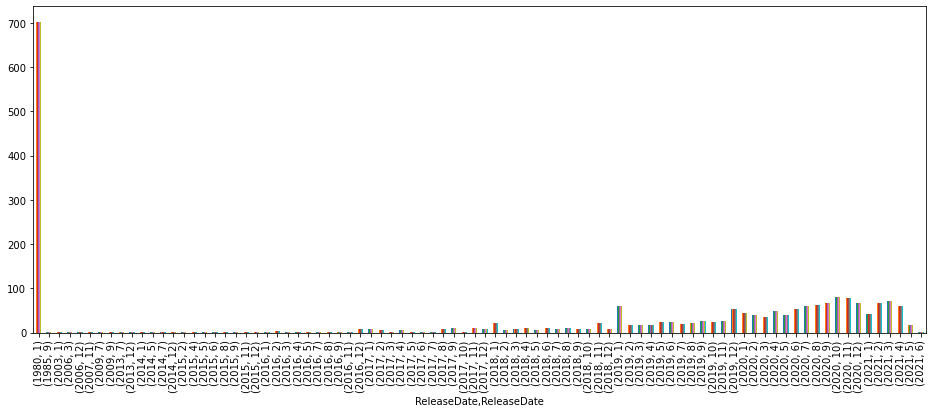

In [5]:
plt.rcParams["figure.figsize"] = (16,6)
df.groupby([df['ReleaseDate'].dt.year, df['ReleaseDate'].dt.month]).count().plot(kind='bar',legend=False);

<h3 style="color:lightgreen">   Attribute 'RetailPrice' and 'pricecat'  </h3>

For the 'RetailPrice' we first look to its **histogram and density plot** to choose a reasonable categorization.

The <b style="color:red"> median price</b> is also plotted, and seems like a good point to dichotomize the variable into: **'Low'** and **'High'.**

Also, it seems like there is another group with noticeable probability centered around the 800€ mark. Therefore, a third category **'Very High'** is chosen for values <b style="color:lightgreen"> over 600€</b>, where it seems like this group starts.

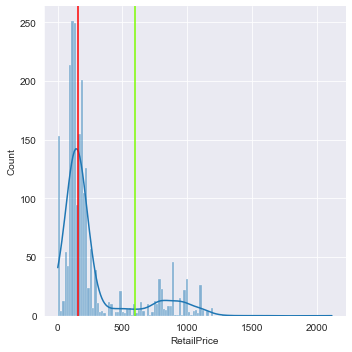

In [6]:
sns.set_style('darkgrid')
sns.displot(df['RetailPrice'],kde=True);
plt.axvline(df["RetailPrice"].median(), 0,200, c='red');
plt.axvline(600, 0,200, c='lawngreen');

The new data frame is presented below:

In [7]:
# df[df[['RetailPrice']<80]]='Low'
df['pricecat'] = 'Low'
df['pricecat'][df['RetailPrice']>df['RetailPrice'].median()] = 'High'
df['pricecat'][df['RetailPrice']>600] = 'Very High'
df[['RetailPrice','pricecat','datecat','Brand','Name','Gender']]

RetailPrice   pricecat  datecat              Brand  \
0           130.0        Low      Old        New Balance   
1           150.0        Low  Unknown        New Balance   
2            90.0        Low  Unknown        New Balance   
3            60.0        Low      Old              Crocs   
4           100.0        Low      Old             Reebok   
5           457.0       High      Old               BAPE   
6            55.0        Low      Old              Yeezy   
7           175.0       High      Old        New Balance   
8           110.0        Low  Unknown        New Balance   
9           175.0       High  Unknown        New Balance   
10           55.0        Low      Old              Yeezy   
11          160.0        Low      Old           Converse   
12           60.0        Low      Old               Vans   
13           85.0        Low      Old           Converse   
14            0.0        Low      Old       Under Armour   
15          240.0       High      Old        New Balance   
16          100.0        Low  Unknown        New Balance   
17          140.0        Low  Unknown        New Balance   
18          100.0        Low      Old        New Balance   
19          200.0       High  Unknown         Timberland   
20          110.0        Low      Old           Converse   
21          100.0        Low      Old               Vans   
22          160.0        Low      Old           Converse   
23          120.0        Low      Old          Notwoways   
24          175.0       High  Unknown        New Balance   
25          190.0       High      Old         Timberland   
26          255.0       High  Unknown               BAPE   
27           90.0        Low      Old        New Balance   
28          140.0        Low      Old           Converse   
29          100.0        Low      Old             Reebok   
30          100.0        Low      Old        New Balance   
31          100.0        Low  Unknown        New Balance   
32          120.0        Low      Old             Reebok   
33          350.0       High      Old             Reebok   
34          150.0        Low      Old        New Balance   
35            0.0        Low  Unknown        New Balance   
36          120.0        Low      Old               Puma   
37          160.0        Low      Old              Asics   
38            0.0        Low      Old        New Balance   
39           90.0        Low  Unknown        New Balance   
40          120.0        Low      Old           Converse   
41          140.0        Low      Old           Converse   
42          135.0        Low      Old           Converse   
43          140.0        Low      Old             Reebok   
44            0.0        Low      Old        New Balance   
45           50.0        Low      Old               Vans   
46          100.0        Low      Old           Converse   
47           45.0        Low      Old              Yeezy   
48          175.0       High      Old        New Balance   
49          135.0        Low      Old           Converse   
50           95.0        Low      Old           Converse   
51           35.0        Low      Old              Yeezy   
52          175.0       High      Old        New Balance   
53          120.0        Low      Old             Reebok   
54           65.0        Low      Old           Converse   
55          115.0        Low      Old           Converse   
56          120.0        Low  Unknown        New Balance   
57           60.0        Low      Old              Crocs   
58          135.0        Low      Old           Converse   
59          295.0       High      Old               BAPE   
60           95.0        Low      Old           Converse   
61          140.0        Low      Old         Timberland   
62          160.0        Low      Old             Reebok   
63          115.0        Low      Old               Puma   
64          130.0        Low      Old        New Balance   
65          140.0        Low      Old         

<h3 style="color:gold">   Attribute 'Brand' and 'brandcat'  </h3>

The 'Brand' variable presents some problems when trying to create the optimal <b style="color:gold">'brandcat'  </b> :

- Brands are not unique because of the difference in lower and upper cases (see ASICS). 
- There is a large number of brands, which is not ideal when trying to visualize the results of CA. 
- Some brands have very low counts. This might lead to making conclusions on CA based on just one case.


In [8]:
df['Brand'].value_counts()

Nike                 499
adidas               489
Jordan               333
Balenciaga           168
New Balance          105
Converse              75
Gucci                 74
OFF-WHITE             66
Reebok                54
Vans                  50
Dior                  49
Off-White             41
Alexander McQueen     37
Puma                  24
Louis Vuitton         22
BAPE                  21
Versace               15
Asics                 12
Yeezy                 10
ASICS                  7
Crocs                  7
Chanel                 6
Common Projects        6
Clarks                 5
Burberry               5
Timberland             4
Prada                  3
Under Armour           3
Notwoways              3
Juice WRLD             2
Dr. Martens            1
Lanvin                 1
PF Flyers              1
Diadora                1
Birkenstock            1
Novesta                1
Fear of God            1
Saucony                1
Onitsuka Tiger         1
Lakai                  1



Therefore, we must deal with these problems. The new variables that begin with **rare** mean that the grouped brands have a very low frequency. The other type of new variables are named by the **majority brand name with an added '&others'**:

In [9]:
df['brandcat'] = df['Brand'].str.lower()
df['brandcat'][df['brandcat']=='yeezy'] = 'adidas'

def rebrand(what,out):
    df['brandcat'][df['brandcat']==what] = out
    return

rebrand('common projects','off-white&others')
rebrand('alexander mcqueen','off-white&others')
rebrand('off-white','off-white&others')

rebrand('clarks','rare1')
rebrand('birkenstock','rare1')
rebrand('fear of god','rare1')
rebrand('notwoways','rare1')
rebrand('saucony','rare1')
rebrand('ewing athletics','rare1')

rebrand('lakai','rare2')
rebrand('diadora','rare2')
rebrand('timberland','rare2')

rebrand('pf flyers','rare3')
rebrand('onitsuka tiger','rare3')

df['brandcat'].value_counts()

nike                499
adidas              499
jordan              333
balenciaga          168
off-white&others    150
new balance         105
converse             75
gucci                74
reebok               54
vans                 50
dior                 49
puma                 24
louis vuitton        22
bape                 21
asics                19
versace              15
rare1                12
crocs                 7
rare2                 6
chanel                6
burberry              5
under armour          3
prada                 3
juice wrld            2
rare3                 2
lanvin                1
novesta               1
dr. martens           1
Name: brandcat, dtype: int64

We can that see in the **frequency plot** below that most sneakers in the website are from the brands: Adidas, Nike and Jordan.

In [10]:
matplotlib.rc_file_defaults()
plt.rcParams["figure.figsize"] = (16,5)
df['brandcat'].value_counts().plot(kind='barh');

<h3 style="color:pink">   Attribute 'Gender' </h3>

The variable 'Gender' also includes an age factor. At first we thought that some of the categories could be grouped. After looking at the CA plot, all components seem to be significant.

In [11]:
df['Gender'].value_counts()

men          1786
women         260
child          96
toddler        30
preschool      29
infant          5
Name: Gender, dtype: int64

As it can be seen in the **frequency plot** below, the avaiable sneakers traded in this website are almost all categorized for men.

In [12]:
matplotlib.rc_file_defaults()
plt.rcParams["figure.figsize"] = (16,5)
df['Gender'].value_counts().plot(kind='barh');

<h3 style="color:red">   Attribute 'Colorway' and 'colorcat', 'colorcat1', 'colorcat2' </h3>

Dealing with 'Colorway' is not straightforward. For convenience, a first approach is to categorize combinations of colors into a majority group **'Combo'**. In the original data set, combinations of colors are named mostly containing the '/' character.

#### 1st Approach

In [13]:
df['Colorway'] = df['Colorway'].str.lower()
df['Colorway'].value_counts()

black                                                                         84
white                                                                         62
black/white                                                                   43
white/black                                                                   26
black/black                                                                   18
white/white                                                                   17
core black/core black/core black                                              14
black/black/black                                                             13
ivory                                                                         11
blue                                                                          11
pink                                                                          11
multi-color/multi-color                                                       10
white/white/white           

We also consider the main colors in 'color_list': **'blue', 'green', 'white', 'yellow', 'pink', 'brown',  'beige', 'purple', 'black', 'grey', 'orange', 'red' and 'navy'**.

In [14]:
def grp_col(out, choose):
    df[out][~df['Colorway'].str.contains('/')&df['Colorway'].str.contains(choose)] = choose
    return

df['colorcat'] = df['Colorway']
df['colorcat'][df['Colorway'].str.contains('/')] = 'Combo' 

color_list = ['blue','green','white','yellow','pink','brown','beige','purple','black','grey','orange','red','navy']
for c in color_list:
    grp_col('colorcat',c)

In [15]:
df['colorcat'].value_counts()

Combo              1917
black                84
white                67
blue                 17
pink                 15
ivory                11
beige                 9
red                   9
grey                  8
multicolor            8
0                     8
navy                  7
green                 6
yellow                6
brown                 5
burgundy              3
qntm                  2
silver                2
cream                 2
oblique               2
wheat                 1
lyubov popova         1
lemon                 1
khaki                 1
bone                  1
edvard munch          1
mauve sole            1
camo                  1
multi                 1
gray                  1
wheat nubuck          1
faith ringgold        1
claude monet          1
jackson pollock       1
oyster                1
coral combi           1
blush                 1
purple                1
Name: colorcat, dtype: int64

There are still some colors with very low counts or rare names. These are grouped into **'Other'**. Finally the <b style="color:red"> 'colorcat' </b> variable would have the following frequency table:

In [16]:
df['colorcat'] = 'Other'
df['colorcat'][df['Colorway'].str.contains('/')] = 'Combo' 
for c in color_list:
    grp_col('colorcat',c)
    
df['colorcat'].value_counts()

Combo     1917
black       84
white       67
Other       55
blue        17
pink        15
beige        9
red          9
grey         8
navy         7
yellow       6
green        6
brown        5
purple       1
Name: colorcat, dtype: int64

#### 2nd Approach

Since the frequency of **'Combo'** is disproportionally high, we try to break this category into different colors. We can do so by choosing the first and second color that comes in every combination and changing <b style="color:red">  'colorcat' </b>  for <b style="color:red">  'colorcat1' </b> and <b style="color:red">  'colorcat2' </b> . Sometimes there is a third color in the combination, but as it will be seen in the CA plot, the interpretation of adding a second, or third color does not make a big difference.

In [17]:
# split the color combinations
df['colorcat1'] = 'Other'
df['colorcat2'] = 'Other'
df['colorcata'] = 'o'
df['colorcatb'] = 'o'

df['colorcata'][df['Colorway'].str.contains('/')] = df["Colorway"].str.split("/").str[0]
df['colorcatb'][df['Colorway'].str.contains('/')] = df["Colorway"].str.split("/").str[1]

In [18]:
def grp_col2(out, tipo, choose):
    df[out][df[tipo].str.contains(choose)] = choose
    return

for c in color_list:
    grp_col2('colorcat1','colorcata',c)
    grp_col('colorcat1',c)
    
for c in color_list:
    grp_col2('colorcat2','colorcatb',c)
    grp_col('colorcat2',c)

Then we have the frequency table for <b style="color:red"> 'colorcat1': </b>

In [19]:
df['colorcat1'].value_counts()

white     633
black     559
Other     477
blue       99
grey       98
red        63
green      56
pink       38
yellow     37
brown      35
beige      33
navy       32
orange     26
purple     20
Name: colorcat1, dtype: int64

And we also have the frequency table for <b style="color:red"> 'colorcat2': </b>

In [20]:
df['colorcat2'].value_counts()

black     525
Other     423
white     422
red       243
grey      167
blue       89
orange     71
green      63
yellow     50
pink       49
navy       31
brown      31
purple     27
beige      15
Name: colorcat2, dtype: int64

Things have improved with respect to the 1st Approach. The transformation of the original variable can be seen in the following table:

In [21]:
df[['Colorway','colorcat1','colorcat2']]

Colorway colorcat1 colorcat2
0                             munsell white/holly green     white     green
1                                    yellow/white-black    yellow     black
2                                      white/grey/black     white      grey
3                                                 black     black     black
4                       dynamic pink/dynamic pink/clear      pink      pink
5                                      green camo/white     green     white
6                   earth brown/earth brown/earth brown     brown     brown
7                                          white/silver     white     Other
8                                            white/blue     white      blue
9                                     black/black/black     black     black
10                  desert sand/desert sand/desert sand     Other     Other
11                            natural ivory/black-egret     Other     black
12                                     black/true white     black     white
13                                    black/black-egret     black     black
14                                    black/white-white     black     white
15                                     black/light blue     black      blue
16                                     white/multicolor     white     Other
17                                   incense/deep taupe     Other     Other
18                                           grey/white      grey     white
19                                                wheat     Other     Other
20                                      blue/yellow-red      blue       red
21                                          multi/multi     Other     Other
22                       persimmon orange/natural ivory    orange     Other
23                beige/moonbeam/exuberance /clear fade     beige     Other
24                                        tan/teal-grey     Other      grey
25                                                black     black     black
26                                          white/white     white     white
27                               slate green/stone blue     green      blue
28                             egret/black-french roast     Other     black
29                          core black/core black-clear     black     black
30                                       red/green/pink       red     green
31                                            off white     white     white
32                            black/white-utility green     black     white
33                                    white/white/black     white     white
34                                           white/pink     white      pink
35                                     black/green/grey     black     green
36                                  puma white/pink glo     white      pink
37                          piedmont grey/graphite grey      grey      grey
38                                     atlas/lemon haze     Other     Other
39                               white/black/blue/green     white     black
40                             milk/white-high risk red     Other       red
41                  grey violet/grey violet-grey violet      grey      grey
42                                    black/white-black     black     black
43                                      white/white-red     white       red
44                                     grey/white-black      grey     black
45                                             pink/tan      pink     Other
46                                      white/black-gum     white     black
47                                    resin/resin/resin     Other     Other
48                                            navy/grey      navy      grey
49                                      black/white-red     black       red
50                                     white/iridescent     white     Other
51                                       bone/bone/bone     Other     Other
52                 

It is clear that the most common first colors are **White and Black:**

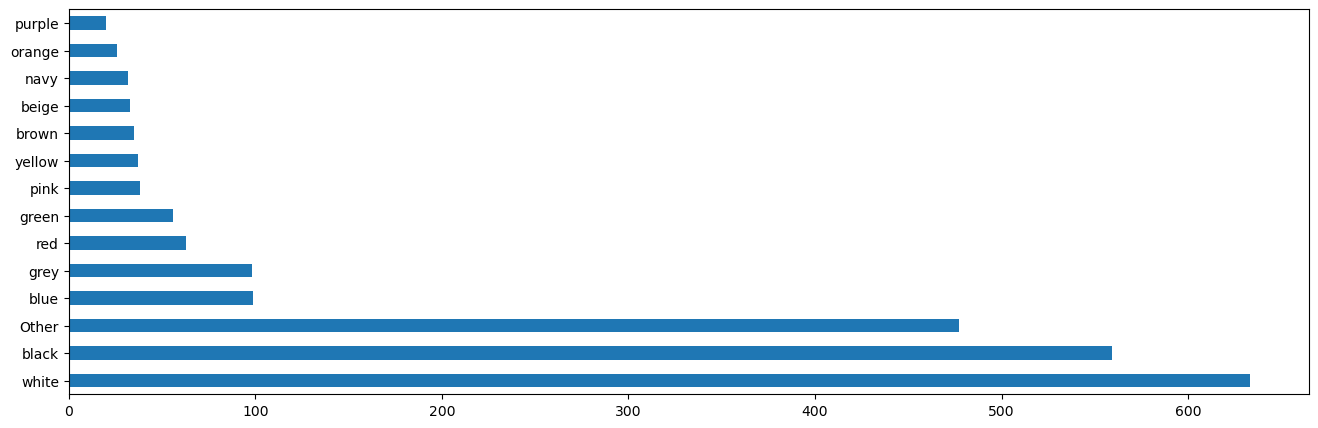

In [22]:
matplotlib.rc_file_defaults()
plt.rcParams["figure.figsize"] = (16,5)
df['colorcat1'].value_counts().plot(kind='barh');

The most popular second color is Black. It can also be seen how **Red and Grey double in frequency** when used as a second color.

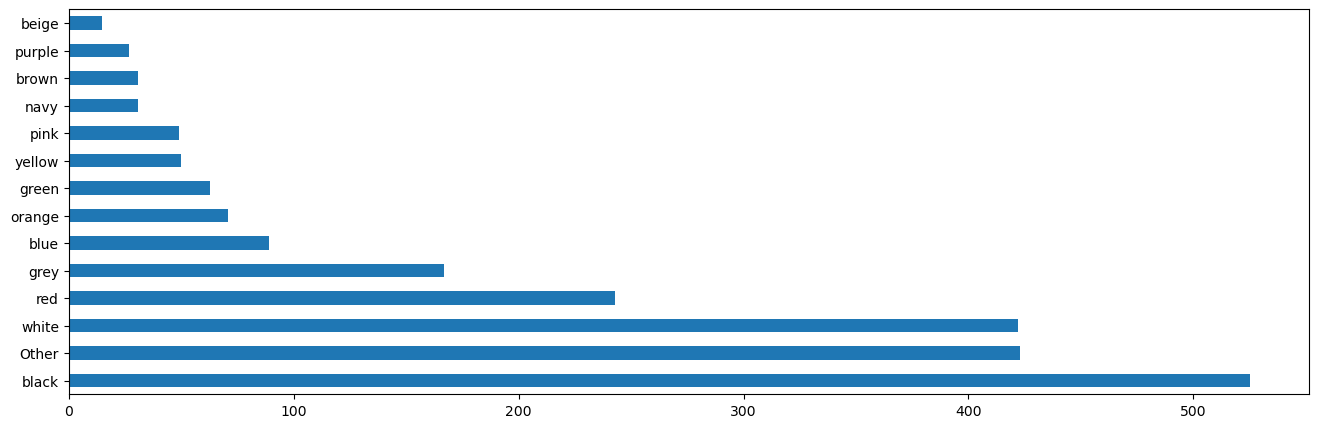

In [23]:
matplotlib.rc_file_defaults()
plt.rcParams["figure.figsize"] = (16,5)
df['colorcat2'].value_counts().plot(kind='barh');

## CA

Now we will use CA on the new **categorical data set**:

In [24]:
df_ca = df[['colorcat1','colorcat2','pricecat','datecat','brandcat','Gender']]
df_ca

colorcat1 colorcat2   pricecat  datecat          brandcat     Gender
0        white     green        Low      Old       new balance        men
1       yellow     black        Low  Unknown       new balance        men
2        white      grey        Low  Unknown       new balance        men
3        black     black        Low      Old             crocs        men
4         pink      pink        Low      Old            reebok      women
5        green     white       High      Old              bape        men
6        brown     brown        Low      Old            adidas        men
7        white     Other       High      Old       new balance        men
8        white      blue        Low  Unknown       new balance        men
9        black     black       High  Unknown       new balance        men
10       Other     Other        Low      Old            adidas        men
11       Other     black        Low      Old          converse        men
12       black     white        Low      Old              vans        men
13       black     black        Low      Old          converse        men
14       black     white        Low      Old      under armour        men
15       black      blue       High      Old       new balance        men
16       white     Other        Low  Unknown       new balance        men
17       Other     Other        Low  Unknown       new balance        men
18        grey     white        Low      Old       new balance        men
19       Other     Other       High  Unknown             rare2        men
20        blue       red        Low      Old          converse        men
21       Other     Other        Low      Old              vans        men
22      orange     Other        Low      Old          converse        men
23       beige     Other        Low      Old             rare1        men
24       Other      grey       High  Unknown       new balance        men
25       black     black       High      Old             rare2        men
26       white     white       High  Unknown              bape        men
27       green      blue        Low      Old       new balance        men
28       Other     black        Low      Old          converse        men
29       black     black        Low      Old            reebok      women
30         red     green        Low      Old       new balance        men
31       white     white        Low  Unknown       new balance        men
32       black     white        Low      Old            reebok        men
33       white     white       High      Old            reebok        men
34       white      pink        Low      Old       new balance        men
35       black     green        Low  Unknown       new balance        men
36       white      pink        Low      Old              puma        men
37        grey      grey        Low      Old             asics        men
38       Other     Other        Low      Old       new balance        men
39       white     black        Low  Unknown       new balance        men
40       Other       red        Low      Old          converse        men
41        grey      grey        Low      Old          converse        men
42       black     black        Low      Old          converse        men
43       white       red        Low      Old            reebok        men
44        grey     black        Low      Old       new balance        men
45        pink     Other        Low      Old              vans        men
46       white     black        Low      Old          converse        men
47       Other     Other        Low      Old            adidas  preschool
48        navy      grey       High      Old       new balance        men
49       black       red        Low      Old          converse        men
50       white     Other        Low      Old          converse        men
51       Other     Other        Low      Old            adidas    toddler
52        grey     Other       High      Old       new balance      women
53       

Firstly, we need to create the set of dummy variables that will be used in the CA. We have 68 of them:

In [25]:
df_dummies=pd.get_dummies(df_ca, prefix=None, prefix_sep='_')
print(df_dummies.shape)
df_dummies.head(3)

(2206, 68)


colorcat1_Other  colorcat1_beige  colorcat1_black  colorcat1_blue  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   

   colorcat1_brown  colorcat1_green  colorcat1_grey  colorcat1_navy  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   

   colorcat1_orange  colorcat1_pink  colorcat1_purple  colorcat1_red  \
0                 0               0                 0              0   
1                 0               0                 0              0   
2                 0               0                 0              0   

   colorcat1_white  colorcat1_yellow  colorcat2_Other  colorcat2_beige  \
0                1                 0                0                0   
1                0                 1                0                0   
2                1                 0                0                0   

   colorcat2_black  colorcat2_blue  colorcat2_brown  colorcat2_green  \
0                0               0                0                1   
1                1               0                0                0   
2                0               0                0                0   

   colorcat2_grey  colorcat2_navy  colorcat2_orange  colorcat2_pink  \
0               0               0                 0               0   
1               0               0                 0               0   
2               1               0                 0               0   

   colorcat2_purple  colorcat2_red  colorcat2_white  colorcat2_yellow  \
0                 0              0                0                 0   
1                 0              0                0                 0   
2                 0              0                0                 0   

   pricecat_High  pricecat_Low  pricecat_Very High  datecat_New  datecat_Old  \
0              0             1                   0            0            1   
1              0             1                   0            0            0   
2              0             1                   0            0            0   

   datecat_Unknown  brandcat_adidas  brandcat_asics  brandcat_balenciaga  \
0                0                0               0                    0   
1                1                0               0                    0   
2                1                0               0                    0   

   brandcat_bape  brandcat_burberry  brandcat_chanel  brandcat_converse  \
0              0                  0                0                  0   
1              0                  0                0                  0   
2              0                  0                0                  0   

   brandcat_crocs  brandcat_dior  brandcat_dr. martens  brandcat_gucci  \
0               0              0                     0               0   
1               0              0                     0               0   
2               0              0                     0               0   

   brandcat_jordan  brandcat_juice wrld  brandcat_lanvin  \
0                0                    0                0   
1                0                    0                0   
2                0                    0                0   

   brandcat_louis vuitton  brandcat_new balance  brandcat_nike  \
0                       0                     1              0   
1                       0                     1              0   
2                       0                     1              0   

   brandcat_novesta  brandcat_off-white&others  brandcat_prada  brandcat_puma  \
0                 0                          0               0              0   
1                 0                          0               0              0   
2  

Now we can apply CA on the previous data frame:

In [26]:
mca_ind = mca.MCA(df_dummies, benzecri=True)

These are the **eigenvalues** of each of the 68 factors considered:

In [27]:
print(len(mca_ind.L)) #One factor for level
mca_ind.L  #Eigenvalues

61


array([0.172056  , 0.08628764, 0.06602305, 0.06459184, 0.05935244,
       0.05351968, 0.0522199 , 0.04984881, 0.04657218, 0.04477081,
       0.04121054, 0.03998443, 0.03733485, 0.0342334 , 0.03280498,
       0.03119162, 0.03035212, 0.02961307, 0.02927632, 0.02791786,
       0.02722414, 0.02654196, 0.02586616, 0.02555477, 0.02492372,
       0.02426181, 0.02411541, 0.02389979, 0.02387796, 0.02380837,
       0.02378495, 0.02371407, 0.02347687, 0.02293577, 0.02267789,
       0.02219751, 0.02146656, 0.02118088, 0.02092808, 0.02062073,
       0.01935658, 0.0186051 , 0.01762391, 0.01732848, 0.01659934,
       0.01647925, 0.01335359, 0.01323454, 0.01259515, 0.01161689,
       0.01048978, 0.00890602, 0.00860776, 0.0077315 , 0.00683703,
       0.00578403, 0.00526309, 0.00442217, 0.00374346, 0.00288846,
       0.00238783])

<!-- The percentage of variance explained by the the first two factors is about 13%. t -->

To visualize the results in a 2D plot we need two Factors, those with the highest eigenvalues. For these factors we get **the score** of each of the 68 attributes:

In [28]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table4 = pd.DataFrame(columns=df_dummies.columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
table4.loc[fs,  :] = mca_ind.fs_c(N=2).T
table4.loc[cos, :] = mca_ind.cos_c(N=2).T
table4.loc[cont,:] = mca_ind.cont_c(N=2).T * 1000

print(table4.shape)
np.round(table4.astype(float), 2)

(6, 68)


colorcat1_Other  colorcat1_beige  colorcat1_black  \
Factor score         1            -0.39             1.91             0.11   
                     2             0.49             0.49            -0.14   
Squared cosines      1             0.21             0.25             0.02   
                     2             0.33             0.02             0.04   
Contributions x 1000 1            32.34            53.02             2.99   
                     2           100.24             6.82             9.88   

                        colorcat1_blue  colorcat1_brown  colorcat1_green  \
Factor score         1            0.29             0.30             0.04   
                     2            0.07             0.72             0.12   
Squared cosines      1            0.02             0.01             0.00   
                     2            0.00             0.05             0.00   
Contributions x 1000 1            3.55             1.39             0.05   
                     2            0.46            15.96             0.68   

                        colorcat1_grey  colorcat1_navy  colorcat1_orange  \
Factor score         1           -0.00            0.09             -0.08   
                     2            0.10           -0.31             -0.02   
Squared cosines      1            0.00            0.00              0.00   
                     2            0.00            0.01              0.00   
Contributions x 1000 1            0.00            0.11              0.08   
                     2            0.78            2.68              0.01   

                        colorcat1_pink  colorcat1_purple  colorcat1_red  \
Factor score         1            0.77             -0.27           0.08   
                     2            0.19             -0.65          -0.69   
Squared cosines      1            0.06              0.00           0.00   
                     2            0.00              0.03           0.09   
Contributions x 1000 1            9.97              0.63           0.16   
                     2            1.17              7.29          26.40   

                        colorcat1_white  colorcat1_yellow  colorcat2_Other  \
Factor score         1            -0.02              0.13            -0.32   
                     2            -0.26              0.24             0.66   
Squared cosines      1             0.00              0.00             0.12   
                     2             0.17              0.01             0.50   
Contributions x 1000 1             0.11              0.29            19.56   
                     2            38.85              1.86           162.40   

                        colorcat2_beige  colorcat2_black  colorcat2_blue  \
Factor score         1             2.04             0.05            0.53   
                     2             0.71            -0.21            0.19   
Squared cosines      1             0.15             0.01            0.07   
                     2             0.02             0.08            0.01   
Contributions x 1000 1            27.35             0.63           11.06   
                     2             6.56            20.26            2.86   

                        colorcat2_brown  colorcat2_green  colorcat2_grey  \
Factor score         1             0.34            -0.09           -0.04   
                     2             0.67             0.20           -0.24   
Squared cosines      1             0.01             0.00            0.00   
                     2             0.04             0.01            0.03   
Contributions x 1000 1             1.57             0.24            0.14   
                     2            12.16             2.13            8.50   

                        colorcat2_navy  colorcat2_orange  colorcat2_pink  \
Factor score         1            0.17             -0.29            0.68   
                     2           -0.36             -0.17            0.10   
Squared cosines      1            0.00             

In [29]:
Factors=table4.iloc[:2,:].T
Factors.columns=["Factor_1","Factor_2"]

We can create the labels that will be shown in the graph by using again the split function:

In [30]:
labels=Factors.index
labels2 = labels.str.split("_").str[1]

### CA Plot taking into account the first color

Now that we can visualize the results, we will start with a simple version of the data set. First **only the 'colorcat1'** is considered, to help better understanding the main attributes. We are then left with 54 attributes:

In [31]:
Factors_red = Factors[~Factors.index.str.contains('colorcat2')] 
labels_red = Factors_red.index
labels_red2 = labels_red.str.split("_").str[1]
len(Factors_red)
# Factors_red
# Factors.drop()

54

To better visualize the next cell, please toggle scrolling pressing Shift+O or going to Cell>Current Outputs>Toggle Scrolling.

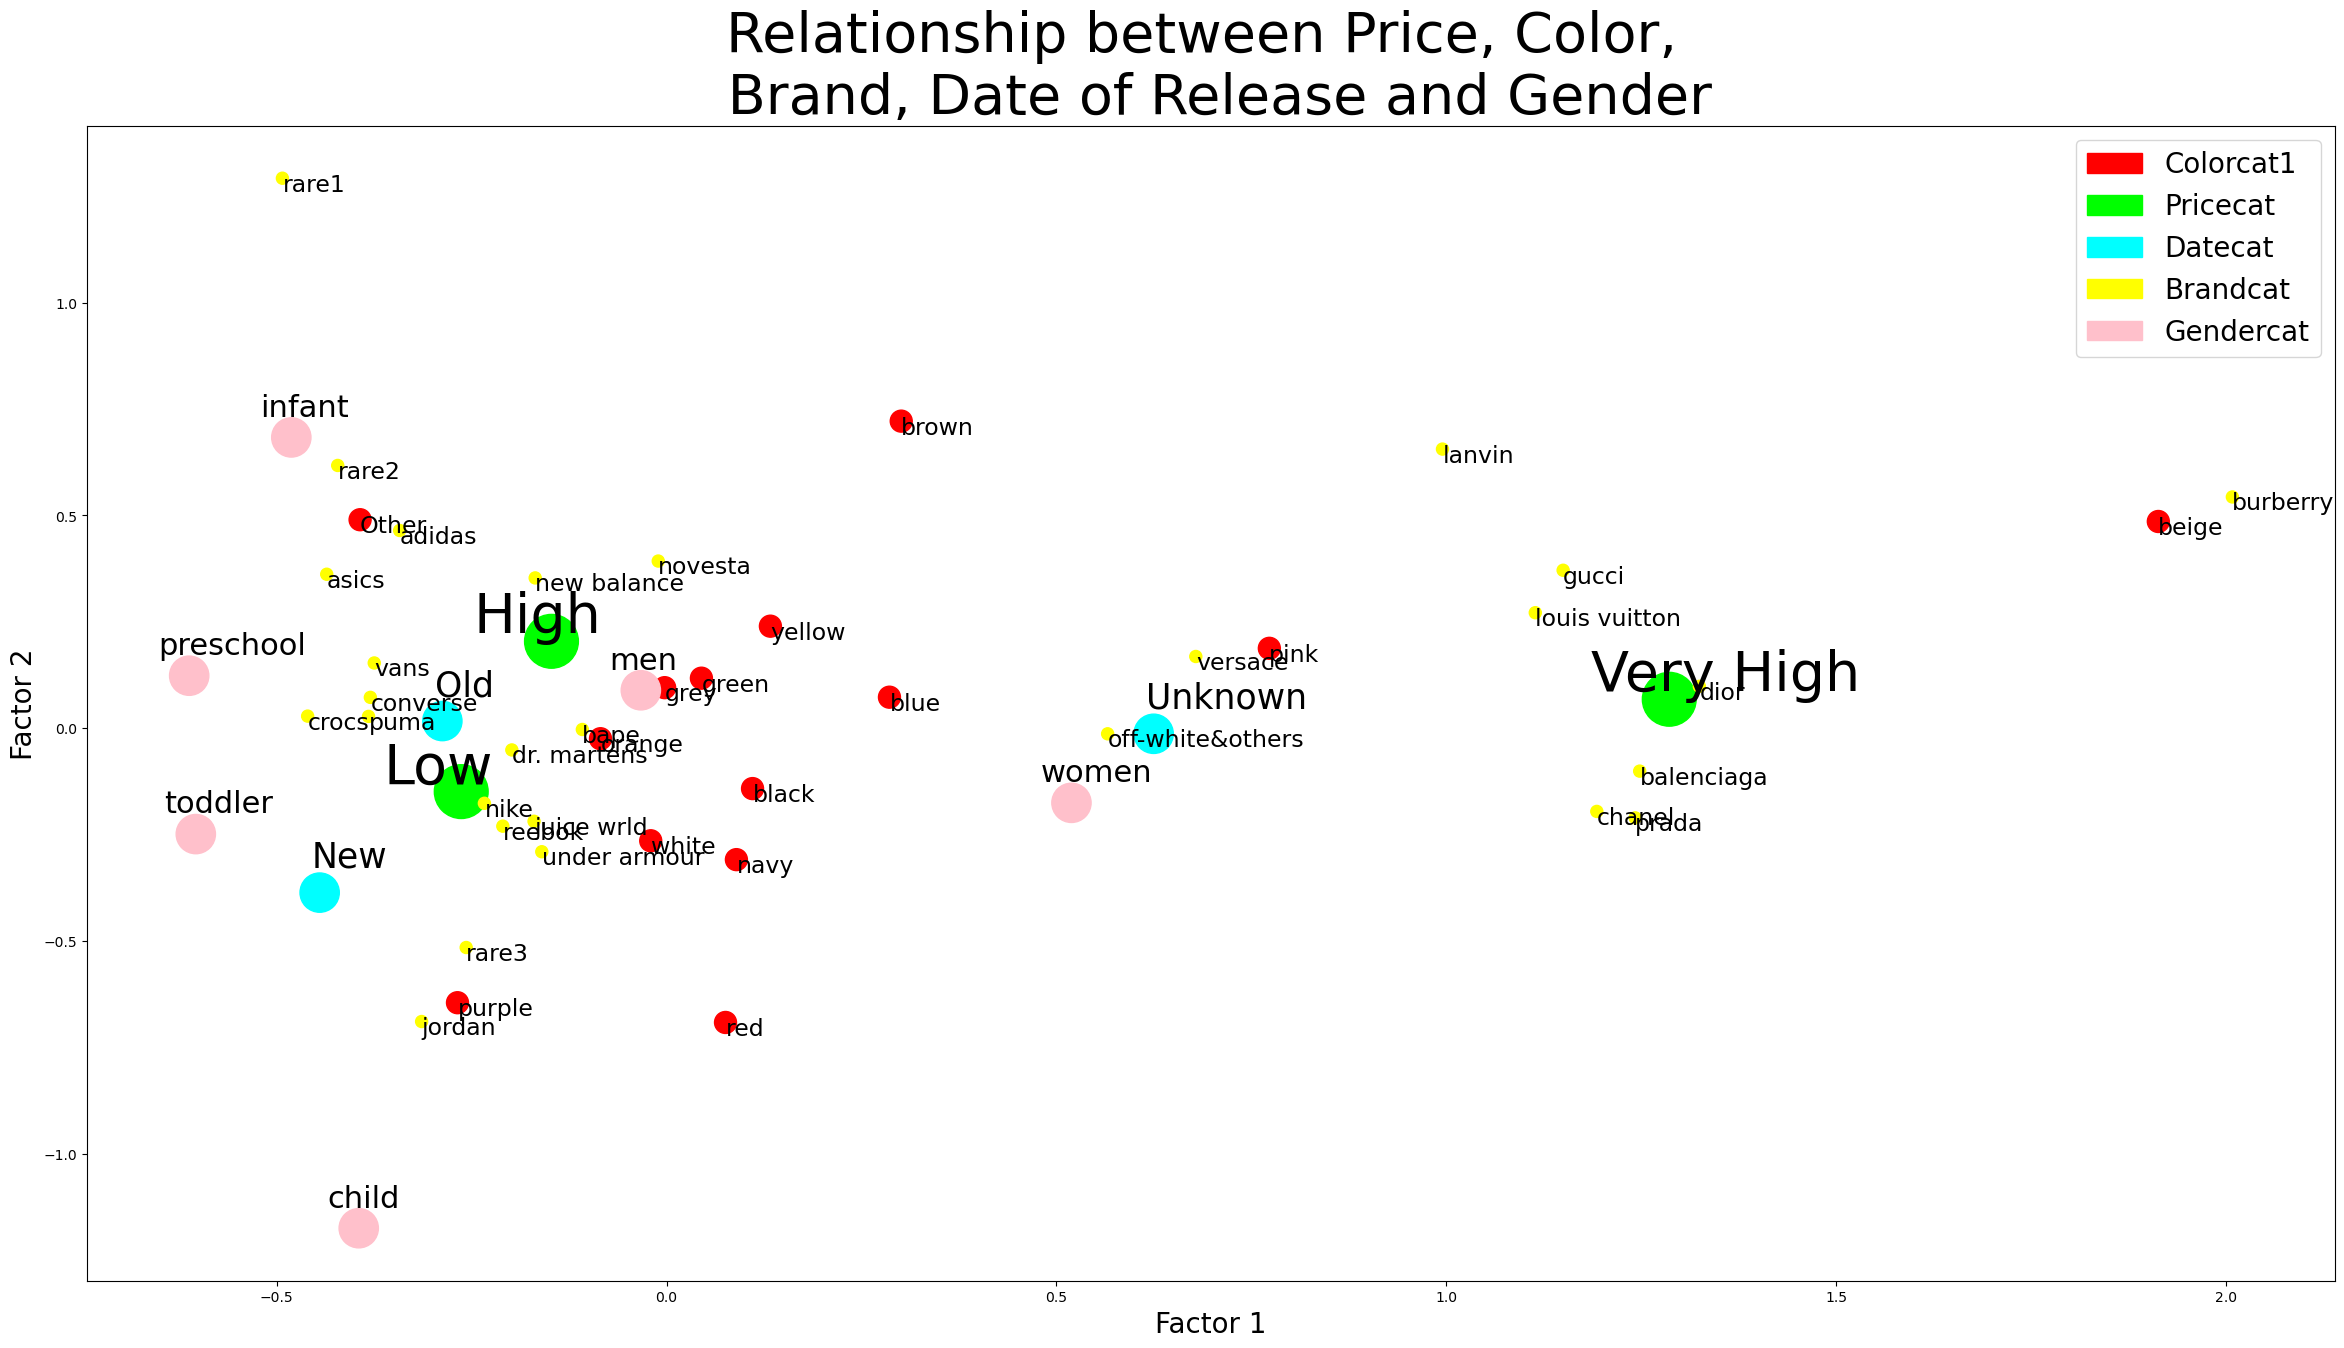

In [32]:
plt.subplots(figsize=(29, 15))

plt.scatter(Factors_red["Factor_1"], Factors_red["Factor_2"], s=[250]*14+[1500]*3+[800]*3+[75]*28+[800]*6, 
            color=["red"]*14+["lime"]*3+["cyan"]*3+["yellow"]*28+["pink"]*6) 
plt.ylabel("Factor 2",size=20)
plt.xlabel("Factor 1",size=20)
plt.title("Relationship between Price, Color, \n Brand, Date of Release and Gender",size=40)

for i, txt in enumerate(Factors_red.index):
    if 13<i<17:
        plt.annotate(labels_red2[i], (Factors_red["Factor_1"][i]-0.1, Factors_red["Factor_2"][i]+0.02),fontsize=40)
    elif 16<i<20:
        plt.annotate(labels_red2[i], (Factors_red["Factor_1"][i]-0.01, Factors_red["Factor_2"][i]+0.06),fontsize=25)
    elif 47<i<54:
        plt.annotate(labels_red2[i], (Factors_red["Factor_1"][i]-0.04, Factors_red["Factor_2"][i]+0.05),fontsize=22)
    else:
        plt.annotate(labels_red2[i], (Factors_red["Factor_1"][i], Factors_red["Factor_2"][i]-0.03),fontsize=17)
        
color1_patch = mpatches.Patch(color='red', label='Colorcat1')
price_patch = mpatches.Patch(color='lime', label='Pricecat')
date_patch = mpatches.Patch(color='cyan', label='Datecat')
brand_patch = mpatches.Patch(color='yellow', label='Brandcat')
gender_patch = mpatches.Patch(color='pink', label='Gendercat')
plt.legend(handles=[color1_patch,price_patch,date_patch,brand_patch,gender_patch], fontsize=20,loc="upper right")

plt.show()

Many conclusions can be made from this plot:

- As we all know, luxury brands like Gucci, Dior, Louis Vuitton or Balenciaga are extremely expensive. Therefore in this graph, they remain close to the pricecat value of **Very High**. What we might not have anticipated is that Pink and Beige are the colors most related to this price category.


- Some colors are very related to certain brands. If you think of the Jordan brand, one of its most popular colors is **Red**. This is confirmed in the plot, having Red very close to Jordan, and with **Purple** even more related to it. **Beige** seems very common in the Burberry  brand. **Other** (mixed non-traditional colors) is very related to Adidas, which is reasonable given how original they are when designing models.


- Gender has a big influence in price, colors and brands. The **Men** category seems to very related to traditional (boring) colors, specially  grey. More traditional brands like Nike or New Balance seem to be more related to them too. The **Women** category seems to be more related to luxury brands, higher price tags and unpopular colors.


- Looking at the young age difference included in Gender we can see what is more important to them. All very young categories **Infant, Toddler, Preschool** are related to traditional brands. **Toddler** seem to be very related to newly released shoes (in the last month). The category **Child** is for young teenagers. It is sensible that it is closer to Low than any other price tag, so they can afford sneakers on the website. Also, it is reasonable that they are closely related to the Jordan brand, a very popular brand among all teenagers.


- The date of release gives some insight into how **New** is related to the younger audience and the brand Jordan. Also a newly released model seems to be generally more lowerly priced than higherly. This attribute though, should be more investigated. As we saw, 30% of our observations were from the **Unknown** category, so interpretations regarding 'datecat' should be done with care. 



### CA Plot taking into account all variables

Now we will analyze if adding the second color **'colorcat2'** contributes to the analysis. This time we use the full size attribute set:

In [33]:
len(Factors)

68

Again, to better visualize the next cell, please toggle scrolling pressing Shift+O or going to Cell>Current Outputs>Toggle Scrolling.

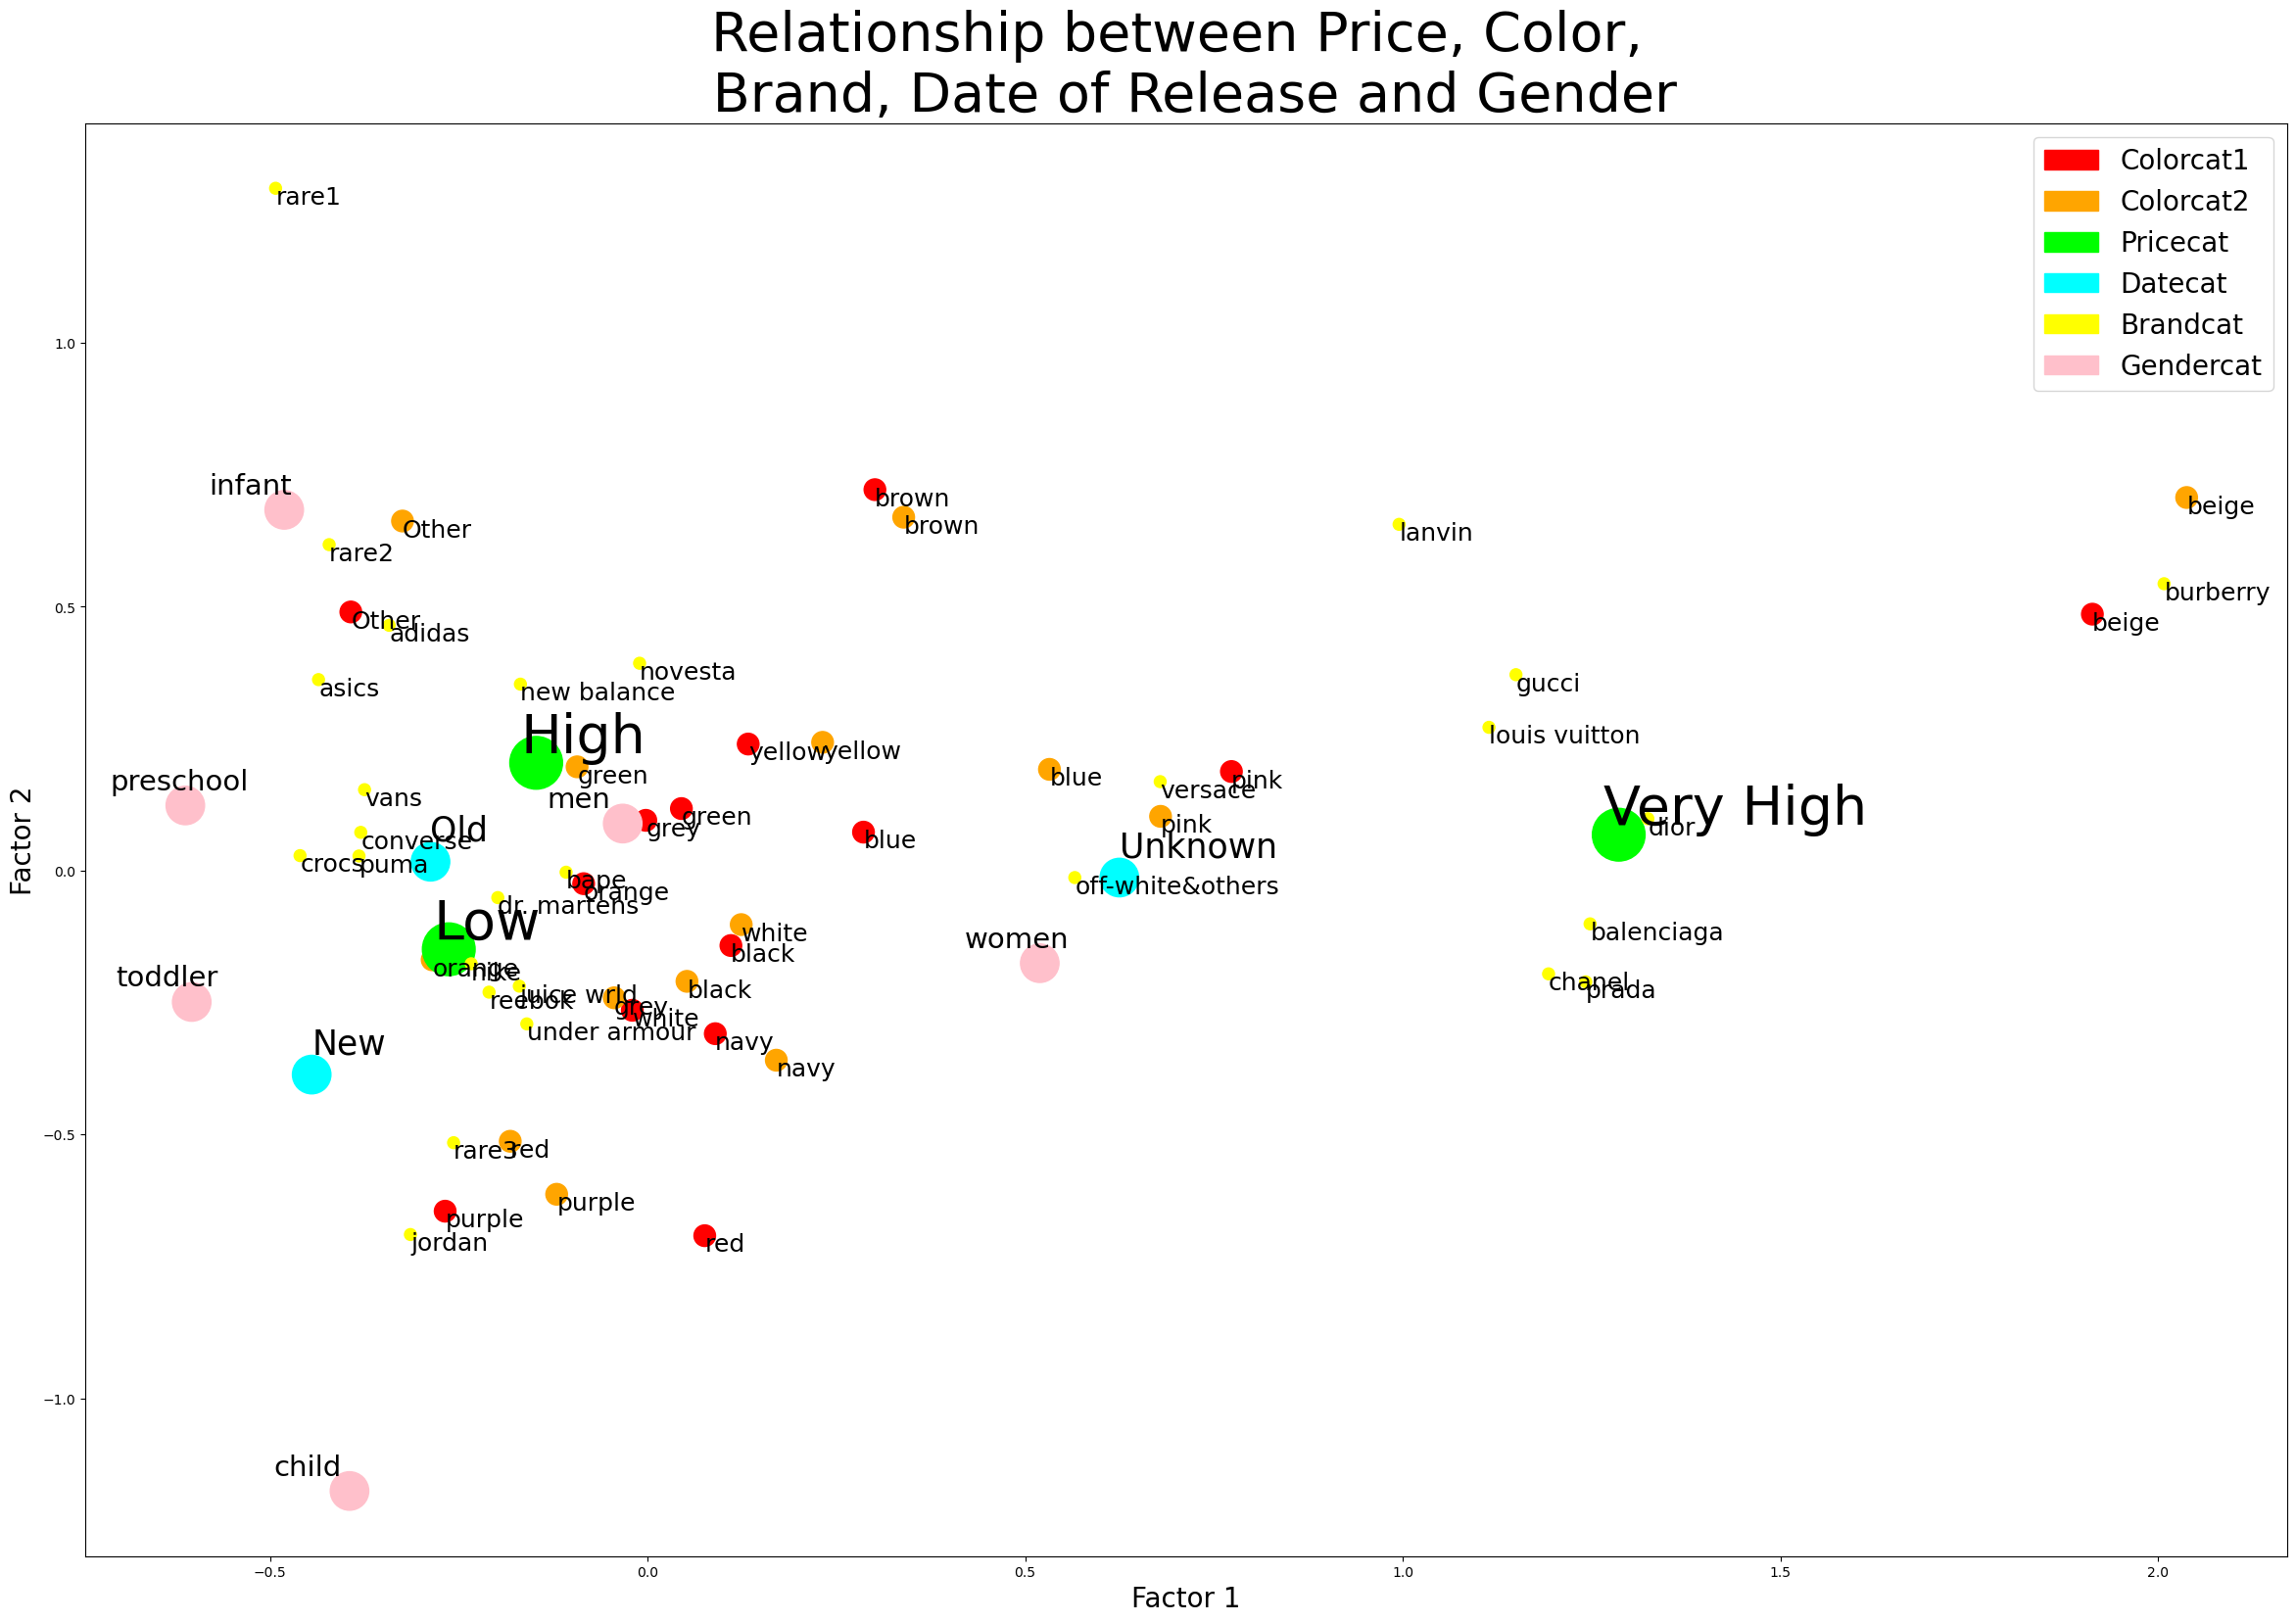

In [34]:
plt.subplots(figsize=(29, 19))

plt.scatter(Factors["Factor_1"], Factors["Factor_2"], s=[250]*28+[1500]*3+[800]*3+[75]*28+[800]*6, 
            color=["red"]*14+["orange"]*14+["lime"]*3+["cyan"]*3+["yellow"]*28+["pink"]*6) 
plt.ylabel("Factor 2",size=20)
plt.xlabel("Factor 1",size=20)
plt.title("Relationship between Price, Color, \n Brand, Date of Release and Gender",size=40)

for i, txt in enumerate(Factors.index):
    if 27<i<31:
        plt.annotate(labels2[i], (Factors["Factor_1"][i]-0.02, Factors["Factor_2"][i]+0.02),fontsize=40)
    elif 30<i<34:
        plt.annotate(labels2[i], (Factors["Factor_1"][i], Factors["Factor_2"][i]+0.04),fontsize=25)
    elif 61<i<68:
        plt.annotate(labels2[i], (Factors["Factor_1"][i]-0.1, Factors["Factor_2"][i]+0.03),fontsize=21)
    else:
        plt.annotate(labels2[i], (Factors["Factor_1"][i], Factors["Factor_2"][i]-0.03),fontsize=18)
        
color1_patch = mpatches.Patch(color='red', label='Colorcat1')
color2_patch = mpatches.Patch(color='orange', label='Colorcat2')
price_patch = mpatches.Patch(color='lime', label='Pricecat')
date_patch = mpatches.Patch(color='cyan', label='Datecat')
brand_patch = mpatches.Patch(color='yellow', label='Brandcat')
gender_patch = mpatches.Patch(color='pink', label='Gendercat')
plt.legend(handles=[color1_patch,color2_patch,price_patch,date_patch,brand_patch,gender_patch], fontsize=20,loc="upper right")

plt.show()

Some additional conclusions can be made from this plot:

- In general, adding a second color does **not add much information** that we did not have already with the first color. Usually the first and the second color are the same, and therefore they are related in the graph.


- The second colors that doubled in frequency (**Grey, Red**) as we saw in the exploratory analysis seem to remain slightly less related to their 1st pair. That suggests that these colors are frequently used with another color as the main.


- Finally, there is highly related pair of different colors. With **Black** as the first color and **White** as the second.
